Playing around with the SBA dataset
CDC: https://www.sba.gov/category/lender-navigation/steps-sba-lending/cdc504-loans (Certified Development Company)
7a vs 504 loan: http://www.hcdc.com/sba-504-vs-sba-7a-loan-programs/

In [1]:
%matplotlib inline

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import csv
import folium
from pylab import *

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_excel('./data/FOIA - 504 (FY1991-Present).xlsx', converters={'BorrZip':str})

In [7]:
df.shape

(163452, 36)

In [4]:
df = df.loc[df['CDC_State'] == 'CA']

In [5]:
df.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,JobsSupported
24,504,BAY AREA DRILLING,"549 GARCIA AVENUE, LOTS 6,7",PITTSBURG,CA,94565,Bay Area Employment Development Company,1801 Oakland Boulevard,Walnut Creek,CA,...,NaN,CONTRA COSTA,CA,SAN FRANCISCO DISTRICT OFFICE,11.0,INDIVIDUAL,PIF,NaN,0,16
34,504,EL POLLO LOCO,1001 WEST ARROW HWY,SAN DIMAS,CA,91773,Landmark Certified Development Corporation,441 East Whittier Boulevard,La Habra,CA,...,EL POLLO LOCO,LOS ANGELES,CA,LOS ANGELES DISTRICT OFFICE,32.0,CORPORATION,CANCLD,NaN,0,32
70,504,"CYNTHIA L CURRY, ATTY AT LAW",1301 L ST.,BAKERSFIELD,CA,93301,Mid State Development Corporation,1631 17th Street,Bakersfield,CA,...,NaN,KERN,CA,FRESNO DISTRICT OFFICE,23.0,INDIVIDUAL,CHGOFF,1995-04-17 00:00:00,75262,2
74,504,DE MAR PLUMBING HEATING & A/C,1705 FINCHWOOD,CLOVIS,CA,93612,Cen Cal Business Finance Group,5094 N. Fruit Avenue,Fresno,CA,...,NaN,FRESNO,CA,FRESNO DISTRICT OFFICE,22.0,CORPORATION,CHGOFF,1996-07-23 00:00:00,79160,6
81,504,MONTESSORI COUNTRY DAT AT RIVE,7575 RUSH RIVER DRIVE,SACRAMENTO,CA,95831,Greater Sacramento Certified Development Corpo...,5428 Watt Avenue,North Highlands,CA,...,NaN,SACRAMENTO,CA,SACRAMENTO DISTRICT OFFICE,6.0,INDIVIDUAL,PIF,NaN,0,18


In [9]:
df.BusinessType.unique()

array(['INDIVIDUAL', 'CORPORATION', 'PARTNERSHIP', nan], dtype=object)

In [10]:
df.LoanStatus.unique()

array(['PIF', 'CANCLD', 'CHGOFF', nan, 'EXEMPT', 'NOT FUNDED'], dtype=object)

In [11]:
df['JobsSupported'].groupby(df['LoanStatus']).describe()

LoanStatus       
CANCLD      count     2890.000000
            mean        19.992734
            std         34.738866
            min          0.000000
            25%          4.000000
            50%         10.000000
            75%         20.000000
            max        611.000000
CHGOFF      count     1249.000000
            mean        17.447558
            std         70.722863
            min          0.000000
            25%          3.000000
            50%          7.000000
            75%         16.000000
            max       2232.000000
EXEMPT      count    11299.000000
            mean        11.833791
            std         21.722705
            min          0.000000
            25%          3.000000
            50%          6.000000
            75%         12.000000
            max        650.000000
NOT FUNDED  count     1146.000000
            mean        15.202443
            std         23.566852
            min          0.000000
            25%          4.000

In [12]:
df['paid_in_full'] = (df['LoanStatus'] == 'PIF')
df['charged_off'] = (df['LoanStatus'] == 'CHGOFF')

In [13]:
formula = 'JobsSupported ~ paid_in_full'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          JobsSupported   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sat, 04 Mar 2017   Prob (F-statistic):           4.49e-40
Time:                        14:53:29   Log-Likelihood:            -1.6108e+05
No. Observations:               29046   AIC:                         3.222e+05
Df Residuals:                   29044   BIC:                         3.222e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               13.9306      0.481     28.965      0.000        12.988    14.873
paid_in_full[T.True]     9.7510      0.735     13.271      0.000         8.311    11.191
==============================================================================
Omnibus:                   101286.157   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      57388315032.121
Skew:                          66.984   Prob(JB):                         0.00
Kurtosis:                    6887.810   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df['InitialInterestRate'].groupby(df['LoanStatus']).describe()

/Users/VincentLa/.pyenv/versions/3.5.1/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


LoanStatus       
CANCLD      count     651.000000
            mean        3.258833
            std         0.046189
            min         3.250000
            25%              NaN
            50%              NaN
            75%              NaN
            max         3.500000
CHGOFF      count      33.000000
            mean        3.250000
            std         0.000000
            min         3.250000
            25%              NaN
            50%              NaN
            75%              NaN
            max         3.250000
EXEMPT      count    7138.000000
            mean        3.272765
            std         0.071929
            min         3.250000
            25%              NaN
            50%              NaN
            75%              NaN
            max         3.500000
NOT FUNDED  count    1146.000000
            mean        3.381326
            std         0.124894
            min         3.250000
            25%         3.250000
            50%         3

In [15]:
formula = 'JobsSupported ~ InitialInterestRate'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          JobsSupported   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.469
Date:                Sat, 04 Mar 2017   Prob (F-statistic):              0.116
Time:                        14:53:29   Log-Likelihood:                -46050.
No. Observations:               10382   AIC:                         9.210e+04
Df Residuals:                   10380   BIC:                         9.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -0.2826      8.017     -0.035      0.972       -15.997    15.431
InitialInterestRate     3.8387      2.443      1.571      0.116        -0.950     8.627
==============================================================================
Omnibus:                    11807.746   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1387662.356
Skew:                           5.877   Prob(JB):                         0.00
Kurtosis:                      58.405   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

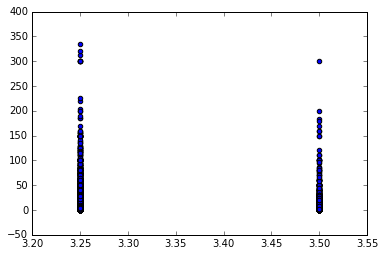

In [16]:
plt.scatter(x=df.InitialInterestRate, y=df.JobsSupported)

In [35]:
x = df['charged_off'].groupby(df['BorrZip']).count()

In [36]:
x

BorrZip
00009     8
02025     1
03101     1
04005     1
04030     1
04063     1
04105     1
04110     1
05008     1
06001     1
06003     1
09178     1
28056     1
33122     1
39773     1
46176     1
48173     1
49454     1
53024     1
53546     1
53719     1
55949     1
59847     1
60566     1
60606     1
60815     1
62064     1
62707     1
75050     2
77011     1
         ..
96051     3
96052     1
96055     1
96057     3
96061     1
96067     7
96073     4
96080    19
96093     1
96094     3
96097     4
96122     1
96130     3
96137     1
96143     1
96145     4
96146     1
96148     2
96150    21
96151     1
96161     4
96201     1
96677     1
97062     3
97120     1
97702     1
98215     1
99100     1
99243     1
99999    10
Name: charged_off, dtype: int64

In [37]:
test_attr = {k: x.loc[k] for k in x.index}
#print(d)

In [38]:
def read_ascii_boundary(filestem):
    '''Reads polygon data from an ASCII boundary file.
    
    Returns a dictionary with polygon IDs for keys. The value for each
    key is another dictionary with three keys:
    'name' - the name of the polygon
    'polygon' - list of (longitude, latitude) pairs defining the main
    polygon boundary
    'exclusions' - list of lists of (lon, lat) pairs for any exclusions in
    the main polygon
    '''
    metadata_file = filestem + 'a.dat'
    data_file = filestem + '.dat'
    # Read metadata
    lines = [line.strip().strip('"') for line in open(metadata_file)]
    polygon_ids = lines[::6]
    polygon_names = lines[2::6]
    polygon_data = {}
    for polygon_id, polygon_name in zip(polygon_ids, polygon_names):
        # Initialize entry with name of polygon.
        # In this case the polygon_name will be the 5-digit ZIP code.
        polygon_data[polygon_id] = {'name': polygon_name}
    del polygon_data['0']
    # Read lon and lat.
    f = open(data_file)
    for line in f:
        fields = line.split()
        if len(fields) == 3:
            # Initialize new polygon
            polygon_id = fields[0]
            polygon_data[polygon_id]['polygon'] = []
            polygon_data[polygon_id]['exclusions'] = []
        elif len(fields) == 1:
            # -99999 denotes the start of a new sub-polygon
            if fields[0] == '-99999':
                polygon_data[polygon_id]['exclusions'].append([])
        else:
            # Add lon/lat pair to main polygon or exclusion
            lon = float(fields[0])
            lat = float(fields[1])
            if polygon_data[polygon_id]['exclusions']:
                polygon_data[polygon_id]['exclusions'][-1].append((lon, lat))
            else:
                polygon_data[polygon_id]['polygon'].append((lon, lat))
    return polygon_data

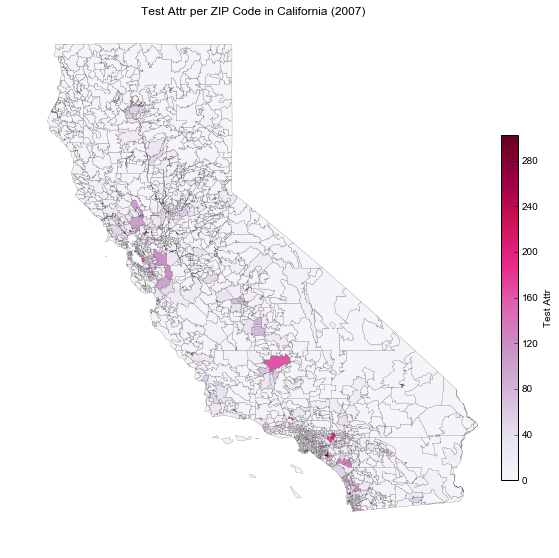

In [51]:
# Example of making a map
# Read in ZIP code boundaries for California
d = read_ascii_boundary('./data/zip5/zt06_d00')

# Read in data for number of births by ZIP code in California
max_test_attr = max(test_attr.values())

# Create figure and two axes: one to hold the map and one to hold
# the colorbar
figure(figsize=(8, 8), dpi=1000)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap = cm.PuRd

# Create the map axis
axes(map_axis)
axis([-125, -114, 32, 42.5])
gca().set_axis_off()

# Loop over the ZIP codes in the boundary file
for polygon_id in d:
    polygon_data = array(d[polygon_id]['polygon'])
    zipcode = d[polygon_id]['name']
    num_test_attr = test_attr[zipcode] if zipcode in test_attr else 0.
    # Define the color for the ZIP code
    fc = cmap(num_test_attr / max_test_attr)
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.2)
    gca().add_patch(patch)
title('Test Attr per ZIP Code in California (2007)')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap,
    norm = mpl.colors.Normalize(vmin=0, vmax=max_test_attr))
cb.set_label('Test Attr')

# Change all fonts to Arial
for o in gcf().findobj(matplotlib.text.Text):
    o.set_fontname('Arial')

# Export figure to bitmap
#savefig('../images/ca_births.png')

In [58]:
# Read in data for number of births by ZIP code in California
f = csv.reader(open('./data/CA_2007_births_by_ZIP.txt'))
births = {}
# Skip header line
header = next(f)
# Add data for each ZIP code
for row in f:
    zipcode, totalbirths = row
    births[zipcode] = float(totalbirths)
max_births = max(births.values())

In [59]:
births

{'90058': 85.0,
 '92586': 163.0,
 '95636': 12.0,
 '95246': 11.0,
 '92247': 6.0,
 '92823': 64.0,
 '92584': 568.0,
 '92004': 25.0,
 '95205': 913.0,
 '95363': 396.0,
 '90028': 287.0,
 '92882': 1137.0,
 '94019': 216.0,
 '90742': 9.0,
 '92587': 213.0,
 '95519': 197.0,
 '93921': 10.0,
 '93389': 11.0,
 '95667': 353.0,
 '95401': 552.0,
 '95838': 770.0,
 '93424': 13.0,
 '95822': 670.0,
 '92109': 375.0,
 '90290': 57.0,
 '92143': 8.0,
 '92071': 678.0,
 '95759': 9.0,
 '91731': 546.0,
 '93461': 22.0,
 '92139': 656.0,
 '92028': 633.0,
 '96148': 8.0,
 '91206': 338.0,
 '92657': 127.0,
 '92260': 262.0,
 '91364': 264.0,
 '92305': 7.0,
 '93667': 26.0,
 '94920': 113.0,
 '95334': 321.0,
 '93206': 56.0,
 '92244': 13.0,
 '95036': 5.0,
 '90650': 1767.0,
 '95953': 157.0,
 '95959': 121.0,
 '93534': 851.0,
 '95728': 6.0,
 '95765': 376.0,
 '95556': 7.0,
 '93241': 458.0,
 '95442': 30.0,
 '90251': 11.0,
 '95346': 5.0,
 '95518': 10.0,
 '95369': 16.0,
 '90630': 466.0,
 '92842': 5.0,
 '93306': 1130.0,
 '95935': 6.0,
 

In [2]:
import folium
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm.save('osm.html')

In [3]:
map_2 = folium.Map(location=[40, -99], zoom_start=4)
map_2.geo_json(geo_path=county_geo, data_out='data2.json', data=df,
               columns=['GEO_ID', 'Unemployment_rate_2011'],
               key_on='feature.id',
               threshold_scale=[0, 5, 7, 9, 11, 13],
               fill_color='YlGnBu', line_opacity=0.3,
               legend_name='Unemployment Rate 2011 (%)',
               topojson='objects.us_counties_20m')
map_2.create_map(path='map_2.html')

AttributeError: 'Map' object has no attribute 'geo_json'

# Exploring Clean Data Set

In [3]:
fips = {
    'county_name': ['SANTA CLARA',
                    'ALAMEDA',          
                    'SAN FRANCISCO',    
                    'CONTRA COSTA',     
                    'SAN MATEO',        
                    'SONOMA',           
                    'SANTA CRUZ',       
                    'MARIN',            
                    'SOLANO',           
                    'NAPA',             
                    'HUMBOLDT',         
                    'MENDOCINO',        
                    'LAKE',
                    'DEL NORTE'],
    'fips': ['085',
             '001',
             '075',
             '013',
             '081',
             '097',
             '087',
             '041',
             '095',
             '055',
             '023',
             '045',
             '033',
             '015',]
}

In [4]:
fips = pd.DataFrame(fips)

In [5]:
fips.head()

,county_name,fips
0,SANTA CLARA,085
1,ALAMEDA,001
2,SAN FRANCISCO,075
3,CONTRA COSTA,013
4,SAN MATEO,081


In [6]:
businesses = pd.read_csv('./data/cbp14co.txt', dtype={'fipscty': str})

In [7]:
businesses.head()

,fipstate,fipscty,naics,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,n1_4,n5_9,n10_19,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
0,1,001,------,NaN,G,10202,G,71561,G,301156,817,408,164,120,87,28,7,2,1,0,0,0,0,0,63,1
1,1,001,11----,NaN,G,58,G,548,H,2862,6,2,3,0,1,0,0,0,0,0,0,0,0,0,63,1
2,1,001,113///,NaN,G,58,G,548,H,2862,6,2,3,0,1,0,0,0,0,0,0,0,0,0,63,1
3,1,001,1133//,NaN,G,58,G,548,H,2862,6,2,3,0,1,0,0,0,0,0,0,0,0,0,63,1
4,1,001,11331/,NaN,G,58,G,548,H,2862,6,2,3,0,1,0,0,0,0,0,0,0,0,0,63,1


In [8]:
#subset to only the counties we care about
businesses = businesses.merge(fips, left_on=['fipscty'], right_on=['fips'])
businesses = businesses[['fipscty', 'est']].groupby(['fipscty']).agg(['sum'])
businesses = businesses.reset_index()
businesses.columns = businesses.columns.get_level_values(0)

In [23]:
businesses

,fipscty,est
0,001,1152510
1,013,1239916
2,015,405052
3,023,352096
4,033,733702
5,041,412022
6,045,382152
7,055,464884
8,075,328432
9,081,767974


In [9]:
#df[['ProjectCounty', 'ApprovalYear', 'was_approved']].groupby(['ProjectCounty', 'ApprovalYear']).agg(['count'])

NameError: name 'df' is not defined

In [24]:
df = pd.read_csv('./data/SFDO_504_7A-clean.csv', dtype={'BorrZip': str}, parse_dates=['ApprovalDate'])

In [25]:
df['ApprovalYear'] = pd.DatetimeIndex(df['ApprovalDate']).year.astype(int)

In [26]:
df = df.merge(fips, left_on=['ProjectCounty'], right_on=['county_name'])


In [27]:
df = df.merge(businesses[['fipscty', 'est']], left_on=['fips'], right_on=['fipscty'])

In [28]:
df.head()

,Column,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,ThirdPartyLender_Name,ThirdPartyLender_City,ThirdPartyLender_State,ThirdPartyDollars,ApprovalYear,county_name,fips,fipscty,est
0,3098.0,7A,PER CASO PRODUCTIONS,6600 YOUNT ST #12,YOUNTVILLE,CA,94599,Bank of Hope,"3731 Wilshire Blvd, Ste 1000",LOS ANGELES,CA,90010.0,15000.0,12750.0,2006-09-19,2006.0,9/30/2006,COMM EXPRS,Community Express,NaN,53.0,323119.0,Other Commercial Printing,0.0,NaN,NAPA,CA,SAN FRANCISCO DISTRICT OFFICE<U+00A0>,5.0,INDIVIDUAL,CHGOFF,6/17/2009,11775.0,0.0,2.0,NaN,NaN,NaN,NaN,2006,NAPA,055,055,464884
1,4752.0,504,WINE GARDEN LLC,6476 WASHINGTON STREET,YOUNTVILLE,CA,94599,Bay Area Employment Development Company,1801 Oakland Boulevard,Walnut Creek,CA,94596.0,881000.0,NaN,2003-09-22,2003.0,11/17/2004,NaN,Sec. 504 - Loan Guarantees - Private Sector Fi...,NaN,240.0,722410.0,Drinking Places (Alcoholic Beverages),1.0,NaN,NAPA,CA,SAN FRANCISCO DISTRICT OFFICE<U+00A0>,5.0,CORPORATION,PIF,NaN,0.0,NaN,25.0,NaN,NaN,NaN,NaN,2003,NAPA,055,055,464884
2,5338.0,7A,BORDEAUX HOUSE,6600 WASHINGTON STREET,YOUNTVILLE,CA,94599,Bank of the West,180 Montgomery St,SAN FRANCISCO,CA,94104.0,527200.0,369040.0,1994-05-05,1994.0,7/31/1994,PLP,Guaranty,NaN,284.0,NaN,NaN,1.0,NaN,NAPA,CA,SAN FRANCISCO DISTRICT OFFICE<U+00A0>,5.0,INDIVIDUAL,PIF,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1994,NAPA,055,055,464884
3,5836.0,7A,"VITA PARTNERS, LLC",6725 WASHINGTON STREET,YOUNTVILLE,CA,94599,First Republic Bank,111 Pine St,SAN FRANCISCO,CA,94111.0,800000.0,720000.0,2009-07-14,2009.0,NaN,PLP,Guaranty,5.5,120.0,722110.0,Full-Service Restaurants,0.0,NaN,NAPA,CA,SAN FRANCISCO DISTRICT OFFICE<U+00A0>,5.0,CORPORATION,CANCLD,NaN,0.0,0.0,85.0,NaN,NaN,NaN,NaN,2009,NAPA,055,055,464884
4,12154.0,7A,NAPA VALLEY BIKE TOURS AND NAP,6488 WASHINGTON ST,YOUNTVILLE,CA,94599,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104.0,210000.0,157500.0,2007-06-05,2007.0,6/30/2007,PLP,Guaranty,NaN,120.0,561520.0,Tour Operators,1.0,NaN,NAPA,CA,SAN FRANCISCO DISTRICT OFFICE<U+00A0>,5.0,CORPORATION,PIF,NaN,0.0,0.0,8.0,NaN,NaN,NaN,NaN,2007,NAPA,055,055,464884


In [29]:
df.columns

Index(['Column', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState',
       'BorrZip', 'BankName', 'BankStreet', 'BankCity', 'BankState', 'BankZip',
       'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate',
       'ApprovalFiscalYear', 'FirstDisbursementDate', 'DeliveryMethod',
       'subpgmdesc', 'InitialInterestRate', 'TermInMonths', 'NaicsCode',
       'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'ProjectCounty',
       'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict',
       'BusinessType', 'LoanStatus', 'ChargeOffDate', 'GrossChargeOffAmount',
       'RevolverStatus', 'JobsSupported', 'ThirdPartyLender_Name',
       'ThirdPartyLender_City', 'ThirdPartyLender_State', 'ThirdPartyDollars',
       'ApprovalYear', 'county_name', 'fips', 'fipscty', 'est'],
      dtype='object')

In [30]:
df['was_approved'] = pd.notnull(df.ApprovalDate)

In [31]:
df.ProjectCounty.value_counts()

SANTA CLARA      9668
ALAMEDA          9477
SAN FRANCISCO    5896
CONTRA COSTA     4760
SAN MATEO        3543
SONOMA           2916
SANTA CRUZ       2050
MARIN            1727
SOLANO           1710
NAPA              910
HUMBOLDT          776
MENDOCINO         424
LAKE              202
DEL NORTE          70
Name: ProjectCounty, dtype: int64

In [32]:
df.groupby(df['LoanStatus']).describe()

/Users/VincentLa/.pyenv/versions/3.5.1/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Column       BankZip  GrossApproval  \
LoanStatus                                                    
CANCLD     count   4512.000000   4503.000000   4.512000e+03   
           mean   21966.058289  64073.895847   3.888190e+05   
           std    12623.335225  29125.865602   5.483675e+05   
           min        1.000000   2109.000000   5.000000e+03   
           25%    11219.000000           NaN   5.000000e+04   
           50%    21942.500000           NaN   1.750000e+05   
           75%    32683.000000           NaN   5.351250e+05   
           max    44181.000000  99362.000000   5.500000e+06   
CHGOFF     count   4851.000000   4847.000000   4.851000e+03   
           mean   21739.209854  63499.914793   1.785479e+05   
           std    12800.308200  28366.643299   3.030745e+05   
           min        6.000000   2886.000000   5.000000e+03   
           25%    10647.000000           NaN   2.500000e+04   
           50%    21226.000000           NaN   5.000000e+04   
           75%    32789.000000           NaN   1.877500e+05   
           max    44182.000000  99362.000000   2.409000e+06   
COMMIT     count    666.000000    666.000000   6.660000e+02   
           mean   22153.181682  62308.486486   2.981746e+05   
           std    12891.379691  17713.204853   7.028632e+05   
           min       95.000000   2109.000000   5.000000e+03   
           25%    10415.500000  57104.000000   1.000000e+04   
           50%    22105.500000  57104.000000   3.000000e+04   
           75%    33370.000000  57104.000000   2.000000e+05   
           max    44142.000000  97470.000000   5.000000e+06   
EXEMPT     count   9726.000000   9726.000000   9.726000e+03   
           mean   22182.414559  77118.991877   5.592486e+05   
           std    12696.880888  23013.988376   6.835154e+05   
           min        4.000000   1701.000000   5.000000e+03   
           25%    11336.000000  57104.000000   1.440000e+05   
           50%    22197.000000  92106.000000   3.450000e+05   
           75%    33187.750000  94612.000000   7.238750e+05   
           max    44184.000000  99362.000000   5.500000e+06   
NOT FUNDED count    253.000000    253.000000   2.530000e+02   
           mean   22562.343874  94058.474308   1.352099e+06   
           std    12640.388316   1314.741780   1.321512e+06   
           min      125.000000  80202.000000   1.110000e+05   
           25%    11695.000000  94111.000000   4.680000e+05   
           50%    22090.000000  94596.000000   8.740000e+05   
           75%    33837.000000  94612.000000   1.773000e+06   
           max    43444.000000  96002.000000   5.500000e+06   
PIF        count  24118.000000  24079.000000   2.411800e+04   
           mean   22146.754955  69001.245484   3.156387e+05   
           std    12791.761013  26522.018513   4.046157e+05   
           min        2.000000   2818.000000   4.500000e+03   
           25%    11001.000000           NaN   5.000000e+04   
           50%    22252.500000           NaN   1.680000e+05   
           75%    33242.750000           NaN   4.209375e+05   
           max    44186.000000  99362.000000   5.000000e+06   

                  SBAGuaranteedApproval  ApprovalFiscalYear  \
LoanStatus                                                    
CANCLD     count           3.888000e+03         4512.000000   
           mean            2.477892e+05         2004.240913   
           std             3.960431e+05            6.348120   
           min             2.500000e+03         1991.000000   
           25%                      NaN         1999.000000   
           50%                      NaN         2004.000000   
           75%                      NaN         2009.000000   
           max             3.750000e+06         2017.000000   
CHGOFF     count           4.560000e+03         4851.000000   
           mean            1.067190e+05         2004.255411   
           std             1.948206e+05            4.464396   
           min             2.500000e+03         1991.0

In [37]:
df_grouped = df[['ProjectCounty', 'ApprovalYear', 'est', 'was_approved']].groupby(['ProjectCounty', 'ApprovalYear', 'est']).agg(['count'])

In [38]:
df_grouped = df_grouped.reset_index()
df_grouped.columns = df_grouped.columns.get_level_values(0)

In [41]:
df_grouped['ratio'] = df_grouped.was_approved / df_grouped.est

In [43]:
#Subset to 2016 just to be simple
df_grouped = df_grouped[df_grouped['ApprovalYear'] == 2016]

In [44]:
df_grouped

,ProjectCounty,ApprovalYear,est,was_approved,ratio
26,ALAMEDA,2016,1152510,461,0.000400
53,CONTRA COSTA,2016,1239916,252,0.000203
79,DEL NORTE,2016,405052,2,0.000005
105,HUMBOLDT,2016,352096,28,0.000080
132,LAKE,2016,733702,9,0.000012
159,MARIN,2016,412022,76,0.000184
186,MENDOCINO,2016,382152,9,0.000024
212,NAPA,2016,464884,44,0.000095
239,SAN FRANCISCO,2016,328432,258,0.000786
266,SAN MATEO,2016,767974,167,0.000217
